In [1]:
import numpy as np
import xarray as xr
import dask as da
import matplotlib.pyplot as plt
%matplotlib notebook
import jmkfigure

plt.style.use('ggplot')
plt.rcParams['figure.constrained_layout.use'] = True
#print(plt.rcParamsDefault)
plt.rcParams['axes.titlesize'] = 'large'


<IPython.core.display.Javascript object>


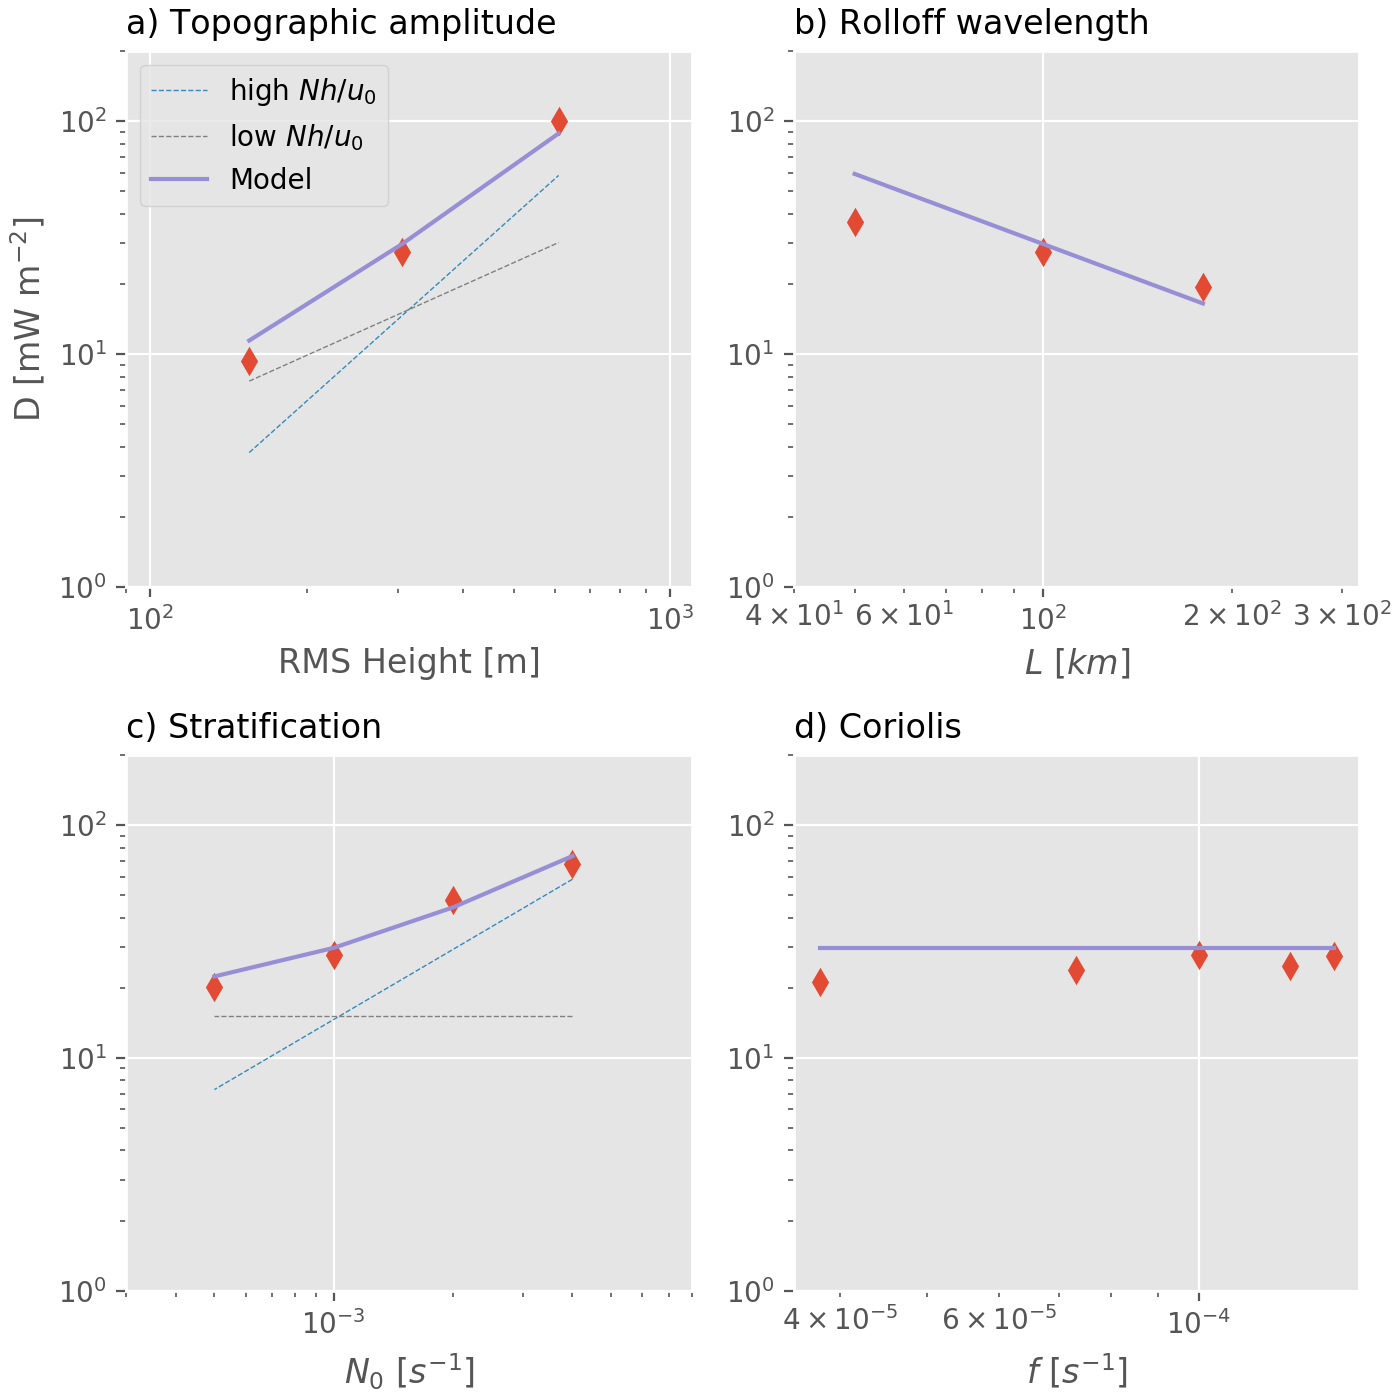

155
305
610
[180. 100.  50.]


In [7]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

ax = axs[0,0]
amps = np.array([155, 305, 610])
Bf = 0. * amps
for num, a in enumerate(amps):
    print(a)
    with xr.open_dataset('../reduceddata/EnergyDemeanLW1kmlowU10Amp%03dK18.nc' % a) as en:
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
ax.semilogy(amps, Bf, 'd')
#ax.loglog(amps, Bf[0] * amps**2/amps[0]**2, 'k--')
#ax.loglog(amps, Bf[0] * amps/amps[0], 'k--')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
N = 1e-3
U0 = 0.1

guess0 = 1000* 1000 * N * U0**2 * (amps)**2 * np.pi / 2. / 100e3
ax.semilogy(amps, guess0, '--', linewidth=0.5, label='high $Nh/u_0$')

UNh = U0 / N / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)

ax.plot(amps, guess1 - guess0 , '--', linewidth=0.5, color='0.5', label='low $Nh/u_0$')
ax.loglog(amps, guess1, label='Model')
ax.set_ylabel('D $[\mathrm{mW\ m^{-2}}]$')
ax.set_xlabel('RMS Height [m]')
ax.set_xlim([90, 1100])
ax.set_ylim([1, 200])
ax.set_title('a) Topographic amplitude', loc='left')

ax.legend()

############################
# roll-off lambda
ax = axs[0, 1]
Ks = np.array([10, 18, 36])
Bf = 0. * Ks
for num, k in enumerate(Ks):
    
    with xr.open_dataset('../reduceddata/EnergyDemeanLW1kmlowU10Amp305K%02dL18.nc' % k) as en:
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)

k = Ks * 1e-4 / 10
lam =  2* np.pi / k * 100. / 34.90658504
print(lam/1e3)
ax.loglog(lam/1e3, Bf, 'd')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
N = 1e-3
U0 = 0.1
amps = 305
guess0 = 1000* 1000 * N * U0**2 * (amps)**2 * np.pi / 2. / lam
# ax.loglog(lam/1e3, guess0, '--', label='Zeroth Order')

UNh = U0 / N / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.loglog(lam/1e3, guess1, color='C2', label='First Order')

ax.set_xlabel('$L \ [km]$')
#ax.set_ylabel('$D\ [mW\ m^{-2}]$')
ax.set_xlim([40, 320])
ax.set_ylim([1, 200])
ax.set_title('b) Rolloff wavelength', loc='left')
# ax.legend()

#########################
## Stratification
ax = axs[1, 0]
Ns = np.array([4, 2, 1, 0.5])
Bf = 0. * Ns
for num, k in enumerate(Ns):
    if k == 1:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305K18.nc'
    else:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305N%04d.nc' % (k*10)
    with xr.open_dataset(fname) as en:
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)

N = np.array([4e-3, 2e-3, 1e-3, 5e-4])
ax.loglog(N, Bf, 'd')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
U0 = 0.1
amps = 305
guess0 = 1000* 1000 * N * U0**2 * (amps)**2 * np.pi / 2. / 100e3
ax.loglog(N, guess0, '--', linewidth=0.5, label='high Nh/U')

UNh = U0 / N / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)

ax.plot(N, guess1 - guess0 + 0*N, '--', linewidth=0.5, color='0.5', label='low Nh/U')

ax.loglog(N, guess1, label='First Order')
ax.set_xlabel('$N_0\ [s^{-1}]$')
#ax.set_ylabel('$D\ [mW\ m^{-2}]$')
ax.set_ylim([1, 200])
ax.set_xlim([3e-4, 8e-3])
ax.set_title('c) Stratification', loc='left')
#ax.legend()

## f...

ax = axs[1, 1]
fs = np.array([38, 73, 100, 126, 141])
Bf = 0. * fs
for num, k in enumerate(fs):
    if k == 100:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305K18.nc'
    else:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305f%03d.nc' % (k)
    with xr.open_dataset(fname) as en:
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
f = np.array([38, 73, 100, 126, 141])/1e6
lat = np.arange(15, 90, 15)
ax.loglog(f, Bf, 'd')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
U0 = 0.1
amps = 305
guess0 = 1000* 1000 * 1e-3 * U0**2 * (amps)**2 * np.pi / 2. / 100e3
#ax.plot(f, guess0 + 0*f, '--', label='Zeroth Order')

UNh = U0 / 1e-3 / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.plot(f, guess1 + 0*f, color='C2', label='First Order')
ax.set_xlabel('$f\ [s^{-1}]$')
ax.set_ylim([10, 100])
ax.set_ylim([1, 200])
ax.set_title('d) Coriolis', loc='left')
#ax.legend() 

if 1:
    jmkfigure.jmkprint('PowerlawDep', 'PlotAnalyzeEnergyDep.ipynb')

## get totals

<IPython.core.display.Javascript object>


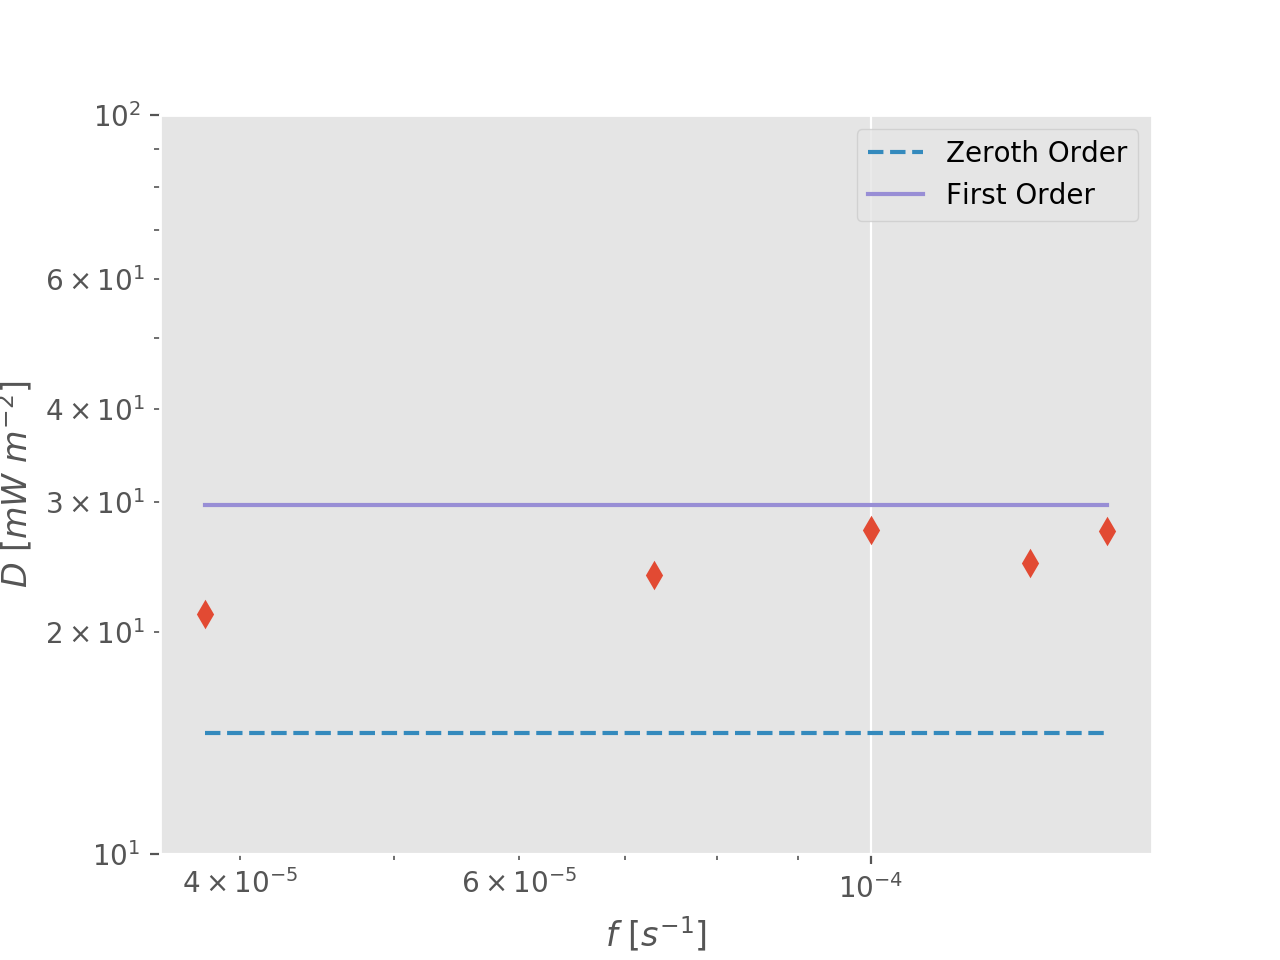

In [16]:
fig, ax = plt.subplots()
f = np.array([38, 73, 100, 126, 141])/1e6
lat = np.arange(15, 90, 15)
ax.loglog(f, Bf, 'd')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
U0 = 0.1
amps = 305
guess0 = 1000* 1000 * 1e-3 * U0**2 * (amps)**2 * np.pi / 2. / 100e3
ax.plot(f, guess0 + 0*f, '--', label='Zeroth Order')

UNh = U0 / 1e-3 / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.plot(f, guess1 + 0*f, label='First Order')
ax.set_xlabel('$f\ [s^{-1}]$')
ax.set_ylabel('$D\ [mW\ m^{-2}]$')
ax.set_ylim([10, 100])
ax.legend()

<IPython.core.display.Javascript object>


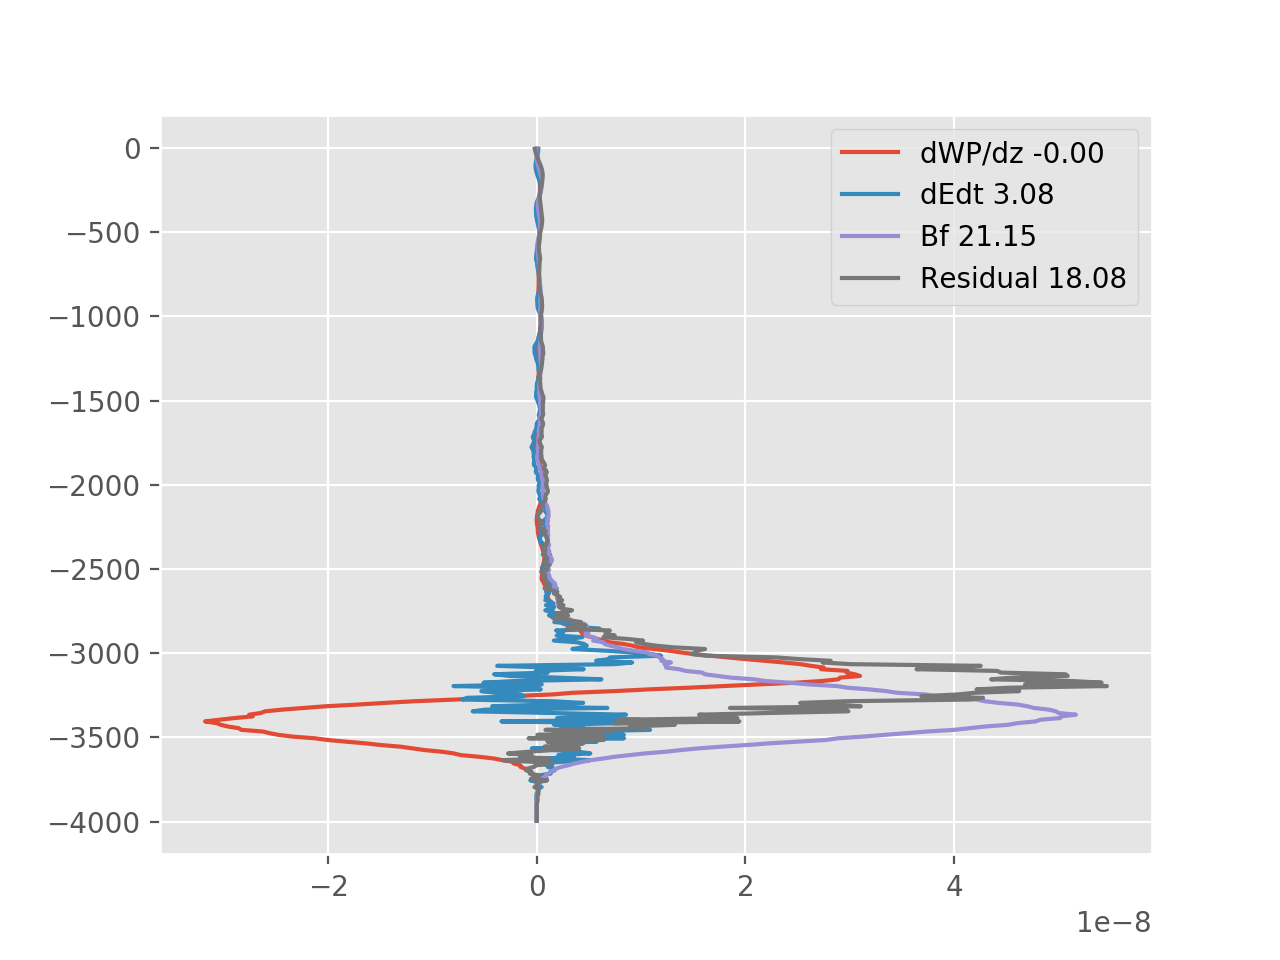

<IPython.core.display.Javascript object>


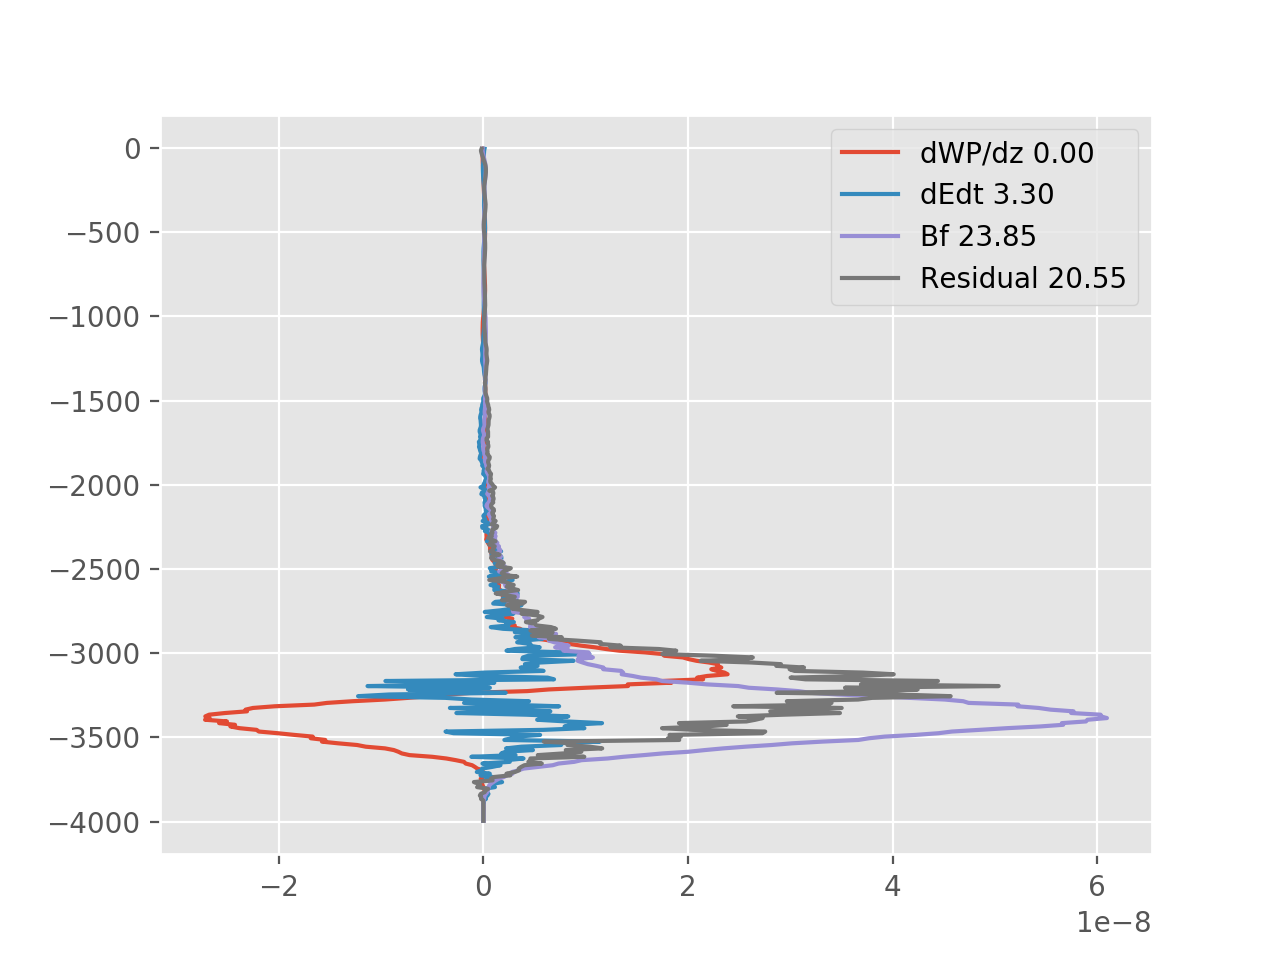

<IPython.core.display.Javascript object>


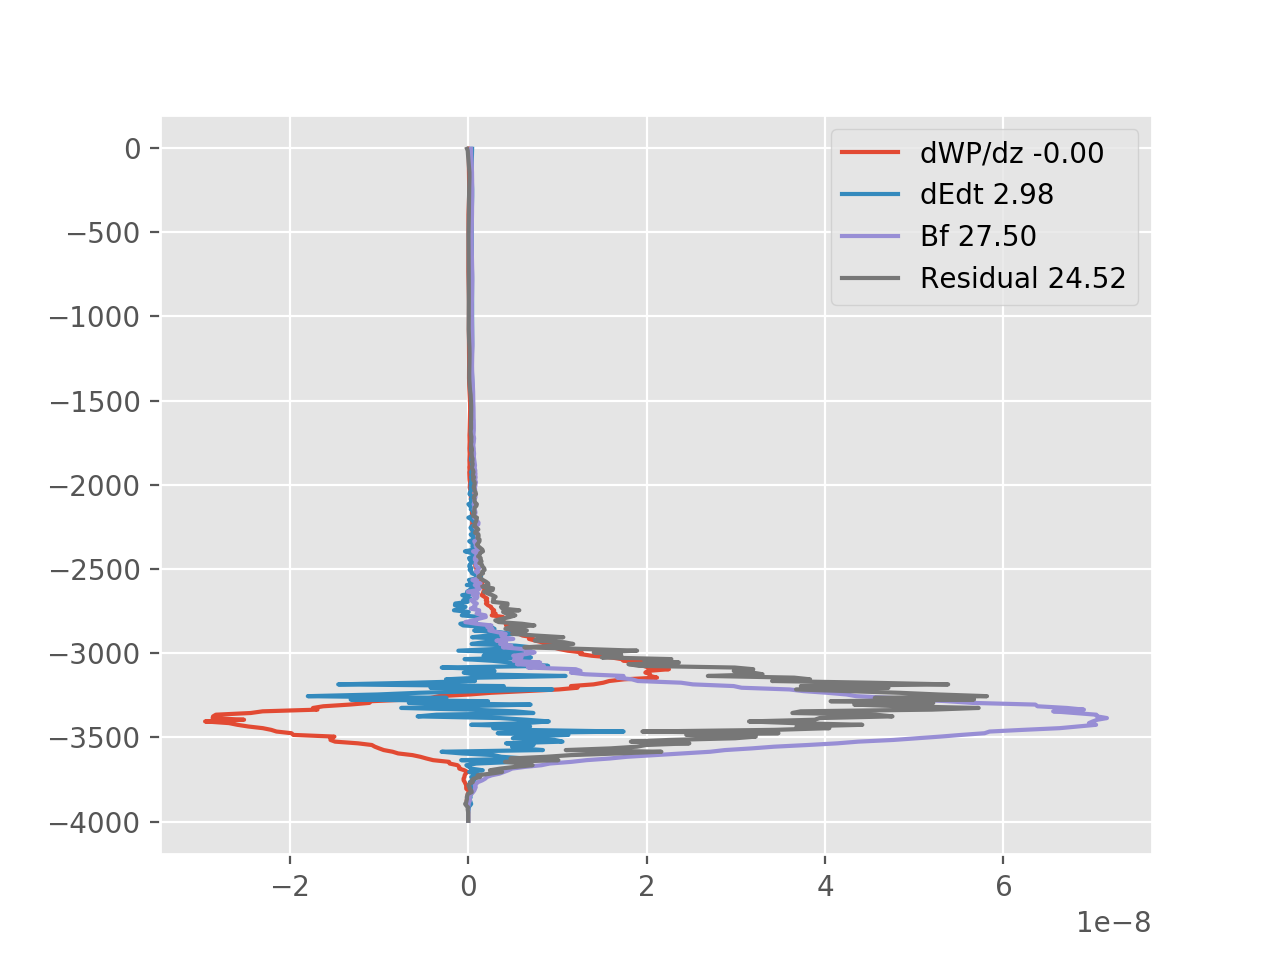

<IPython.core.display.Javascript object>


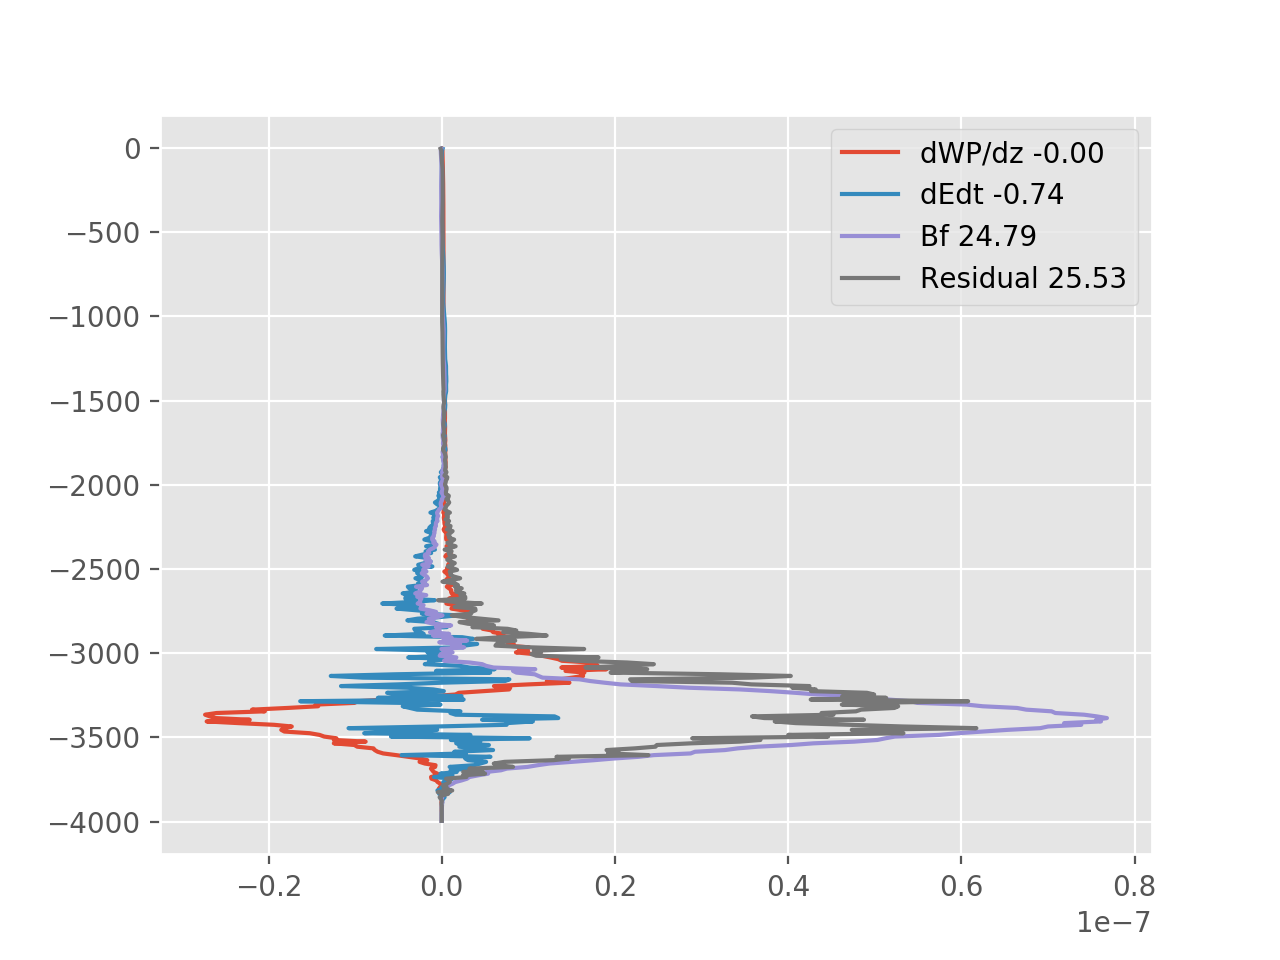

<IPython.core.display.Javascript object>


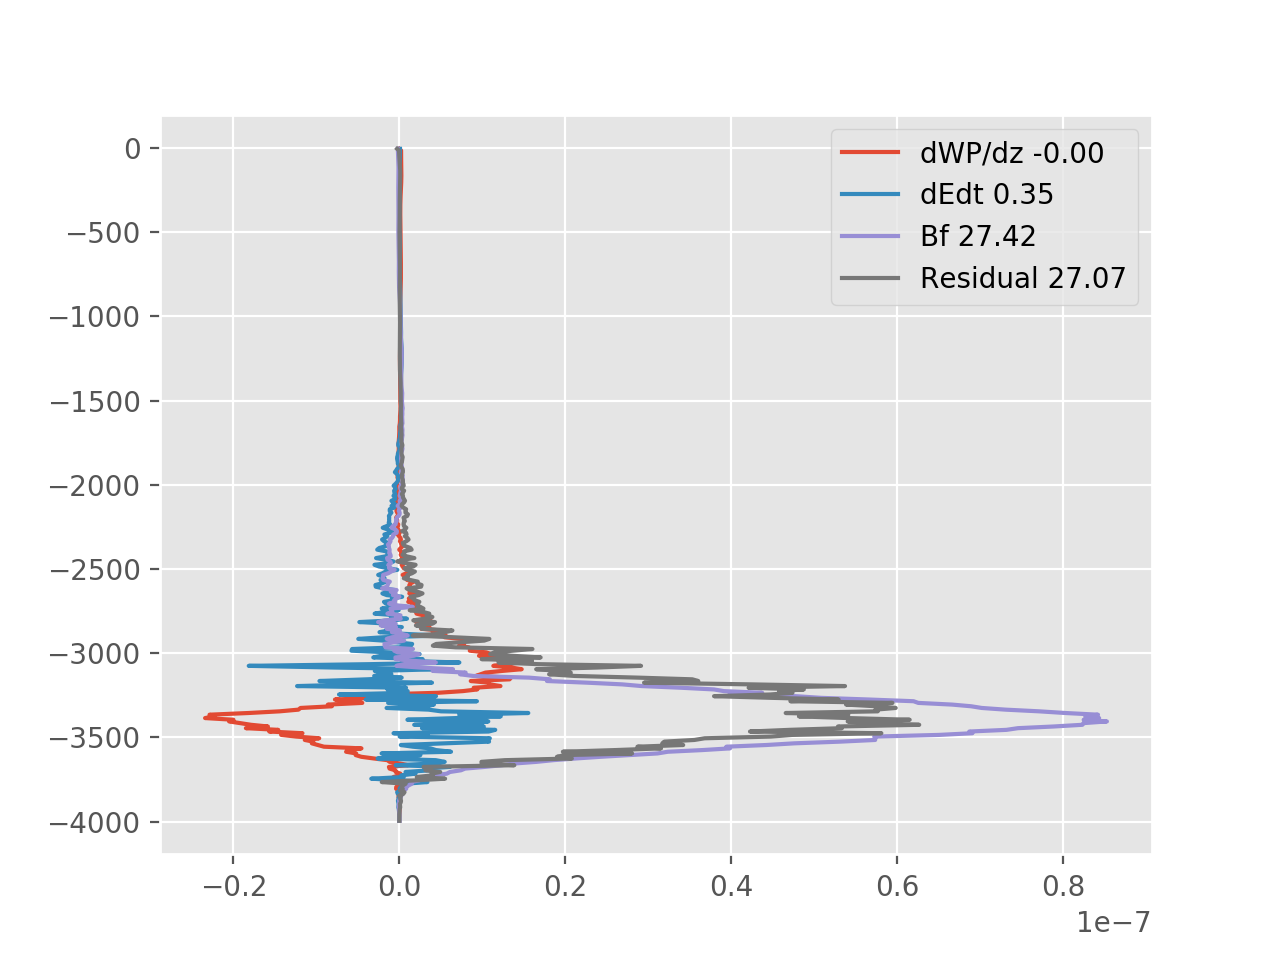

In [15]:
Ns = np.array([38, 73, 100, 126, 141])
Bf = 0. * Ns
for num, k in enumerate(Ns):
    if k == 100:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305K18.nc'
    else:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305f%03d.nc' % (k)
    with xr.open_dataset(fname) as en:
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
        fig, ax = plt.subplots()
        ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
        ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
        ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
        ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))
        ax.legend()